In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.ndimage import gaussian_filter

In [2]:
trainset = pd.read_csv('/home/kandpal/Downloads/mnist_train.csv', header=None, dtype='float64')
testset = pd.read_csv('/home/kandpal/Downloads/mnist_test.csv', header=None, dtype='float64')
# header = None because no header (column names) in the dataframe

train_labels = trainset[0]
test_labels = testset[0]
# store the labels

In [3]:
trainset.drop(columns=0, inplace = True)
testset.drop(columns=0, inplace = True)
# drop label columns from the dataframe

print(trainset.info())
print(testset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1 to 784
dtypes: float64(784)
memory usage: 358.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 1 to 784
dtypes: float64(784)
memory usage: 59.8 MB
None


(784,)


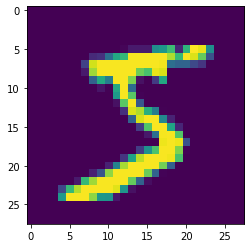

In [4]:
first_image = np.array(list(trainset.iloc[0]))
# select the first row i.e. image 1

print(first_image.shape)
plt.imshow(first_image.reshape(28,28))
# reshaping necessary because the shape is (784,)

In [5]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.linear1 = nn.Linear(784, 100) # encoder first layer
        self.linear2 = nn.Linear(100, 50) # encoder second layer, returns bottleneck 
        self.linear3 = nn.Linear(50, 100) # decoder first layer
        self.linear4 = nn.Linear(100, 784) # decoder second layer, returns the reconstruction
        
    
    def Encoder(self, image):
        
        hidden_encoder = F.relu(self.linear1(image)) 
        bottleneck = F.relu(self.linear2(hidden_encoder))
        
        return bottleneck
  

    def Decoder(self, bottleneck):
        
        hidden_decoder = F.relu(self.linear3(bottleneck))
        reconstruction = F.relu(self.linear4(hidden_decoder))
        
        return reconstruction
    

ae_model = Model().cuda()        

In [6]:
loss_function = nn.MSELoss() # parameters : (input, target)
optimizer = torch.optim.Adam(ae_model.parameters())

In [1]:
# print(torch.cuda.is_available())
# print(torch.cuda.get_device_name(torch.cuda.current_device()))
# print(torch.cuda.current_device())
# print(torch.cuda.device_count())

# commands to make sure gpu is used

epoch number 1 : total epoch loss = 129904346.43534851
difference between true and noisy image = 2412.3857421875


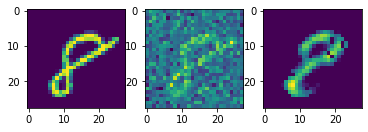

epoch number 2 : total epoch loss = 126742832.18971252
difference between true and noisy image = 2177.4638671875


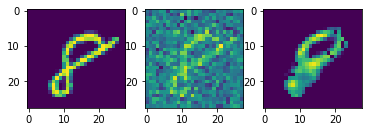

epoch number 3 : total epoch loss = 125246245.19306946
difference between true and noisy image = 383.95477294921875


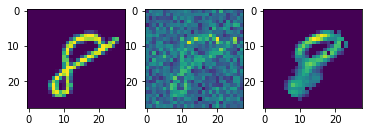

epoch number 4 : total epoch loss = 123355468.85610199
difference between true and noisy image = -5376.2255859375


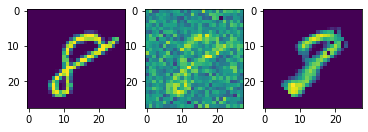

epoch number 5 : total epoch loss = 123152956.81134033
difference between true and noisy image = 3193.7529296875


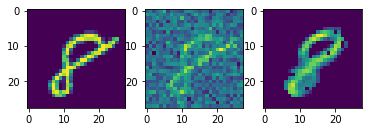

epoch number 6 : total epoch loss = 123074147.02026367
difference between true and noisy image = 2100.613525390625


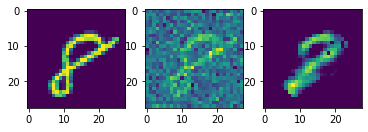

epoch number 7 : total epoch loss = 122886399.7588501
difference between true and noisy image = -349.9497375488281


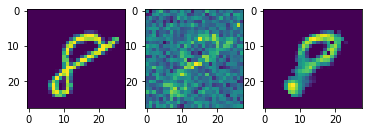

epoch number 8 : total epoch loss = 121896829.8399353
difference between true and noisy image = 1537.13330078125


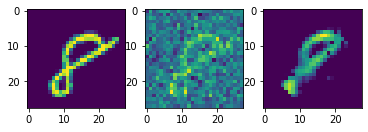

epoch number 9 : total epoch loss = 121734438.06863403
difference between true and noisy image = 1665.3477783203125


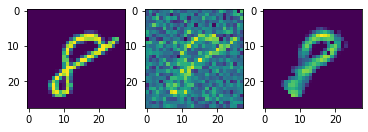

epoch number 10 : total epoch loss = 121523470.59161377
difference between true and noisy image = -915.9535522460938


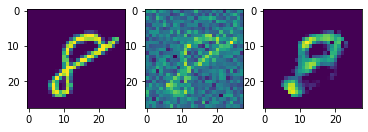

epoch number 11 : total epoch loss = 121151892.98439026
difference between true and noisy image = 2464.03515625


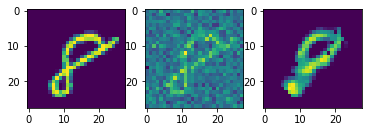

epoch number 12 : total epoch loss = 121362323.72041321
difference between true and noisy image = 4805.15771484375


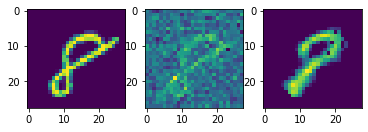

epoch number 13 : total epoch loss = 121208548.0702362
difference between true and noisy image = 3092.48583984375


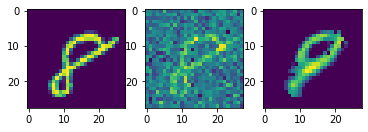

epoch number 14 : total epoch loss = 120946539.43045044
difference between true and noisy image = 868.852783203125


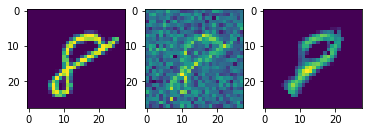

epoch number 15 : total epoch loss = 121262313.7631073
difference between true and noisy image = 7051.07470703125


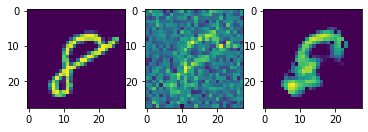

epoch number 16 : total epoch loss = 121084949.84492493
difference between true and noisy image = 2039.8057861328125


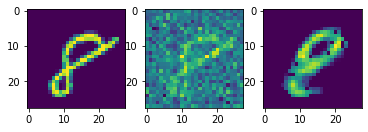

epoch number 17 : total epoch loss = 121075458.61813354
difference between true and noisy image = -897.3829345703125


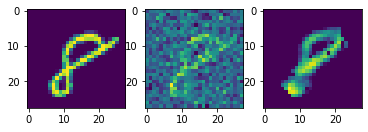

epoch number 18 : total epoch loss = 120492998.76052856
difference between true and noisy image = -1149.0673828125


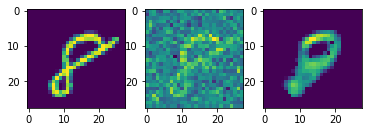

epoch number 19 : total epoch loss = 120506787.95747375
difference between true and noisy image = 945.0919189453125


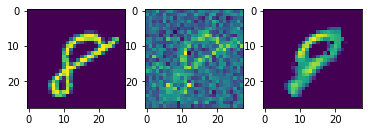

epoch number 20 : total epoch loss = 120538430.98638916
difference between true and noisy image = 870.950439453125


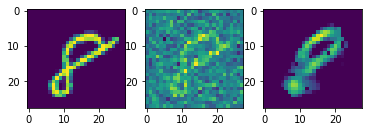

In [14]:
# ae training

epochs = 20

for iterations in range(epochs):
    
    epoch_loss = 0
    
    for image_number in range(len(trainset.index)):
        
        image = np.array(list(trainset.iloc[image_number]))
        image = torch.from_numpy(image).float() 
    # Both, the data and model parameters, should have the same dtype.
        
        gaussian_noise = torch.randn(image.shape)
        noisy_image = image + 100*gaussian_noise
        
        bottleneck = ae_model.Encoder(noisy_image.cuda())
        reconstruction = ae_model.Decoder(bottleneck.cuda())
        
        loss = loss_function(image.cuda(), reconstruction.cuda())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        costs.append(loss.item())
        epoch_loss += loss.item()
    # loss is a single number but it's a tensor. .item() returns the value of the tensor
        
        
    print(f'epoch number {iterations+1} : total epoch loss = {epoch_loss}')
    print(f'difference between true and noisy image = {torch.sum(image - noisy_image)}')
    
    plt.figure(1)
    plt.subplot(131)
    plt.imshow(image.cpu().detach().reshape(28,28).numpy())
    
    plt.subplot(132)
    plt.imshow(noisy_image.reshape(28,28))

    plt.subplot(133)
    plt.imshow(reconstruction.cpu().detach().reshape(28,28).numpy())
    plt.show() 

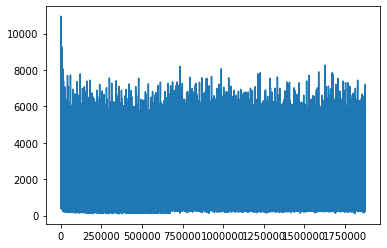

In [22]:
plt.plot(costs)
plt.show()

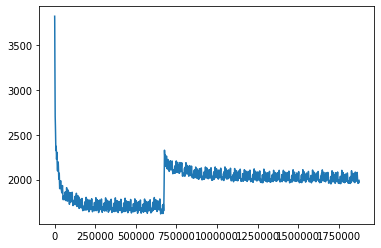

In [25]:
cost = [float(i) for i in costs]
smooth = gaussian_filter(cost,sigma=900)
plt.plot(smooth)
plt.show()